In [1]:
import requests
from bs4 import BeautifulSoup
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
response = requests.get('https://rentapartment.vn/dan-so-dien-tich-quan-tphcm')
print("Text:", response.text[:500])

Text: <!doctype html>
<html lang="en-US">
<head><meta charset="UTF-8" /><script>if(navigator.userAgent.match(/MSIE|Internet Explorer/i)||navigator.userAgent.match(/Trident\/7\..*?rv:11/i)){var href=document.location.href;if(!href.match(/[?&]nowprocket/)){if(href.indexOf("?")==-1){if(href.indexOf("#")==-1){document.location.href=href+"?nowprocket=1"}else{document.location.href=href.replace("#","?nowprocket=1#")}}else{if(href.indexOf("#")==-1){document.location.href=href+"&nowprocket=1"}else{document.lo


In [3]:
soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
# create database
sql_practice_db = sqlite3.connect('sql_practice.db')

# create table Districts
sql_practice_db.execute('CREATE TABLE Districts (district_id INTEGER PRIMARY KEY AUTOINCREMENT, name, area_km2, population, population_density)')

In [5]:
# filter figures for each district
districts_tbody = soup.find_all('tbody')
districts_figures = []
# for i in range(len(districts_tbody)):
districts_tr = districts_tbody[0].find_all('tr')

for j in range(len(districts_tr)):
    districts_td = districts_tr[j].find_all()
    
    district_values = []
    for item in districts_td: 
        district_values.append(item.text)
    districts_figures.append(np.array(district_values))

print(districts_figures)

[array(['Quận 1', '205,180', '7.73', '10', '26,543'], dtype='<U7'), array(['Quận 2', '168,680', '49.74', '11', '3,391'], dtype='<U7'), array(['Quận 3', '196,433', '4.92', '14', '39,925'], dtype='<U7'), array(['Quận 4', '203,060', '4.18', '15', '48,578'], dtype='<U7'), array(['Quận 5', '187,510', '4.27', '15', '43,913'], dtype='<U7'), array(['Quận 6', '258,945', '7.19', '14', '36,014'], dtype='<U7'), array(['Quận 7', '324,620', '35.69', '10', '9,095'], dtype='<U7'), array(['Quận 8', '451,290', '19.18', '18', '23,529'], dtype='<U7'), array(['Quận 9', '397,000', '114', '13', '3,482'], dtype='<U7'), array(['Quận 10', '372,450', '5.72', '15', '65,113'], dtype='<U7'), array(['Quận 11', '332,536', '5.14', '16', '64,695'], dtype='<U7'), array(['Quận 12', '520,175', '52.78', '11', '9,855'], dtype='<U7'), array(['Bình Thạnh', '490,618', '20.76', '20', '23,632'], dtype='<U10'), array(['Thủ Đức', '524,670', '48', '12', '10,930'], dtype='<U7'), array(['Gò Vấp', '663,313', '19.74', '16', '33,602'], 

In [6]:
# add figure ditricts into table
for figure in districts_figures: 
    sql_practice_db.execute(f'INSERT INTO Districts (name, area_km2, population, population_density) VALUES (?, ?, ?, ?)', (figure[0], figure[2], figure[1], figure[4]))

In [7]:
# read sql using pandas
df_districts = pd.read_sql_query('SELECT * FROM Districts', sql_practice_db)
df_districts.head()

,district_id,name,area_km2,population,population_density
0,1,Quận 1,7.73,"205,180","26,543"
1,2,Quận 2,49.74,"168,680","3,391"
2,3,Quận 3,4.92,"196,433","39,925"
3,4,Quận 4,4.18,"203,060","48,578"
4,5,Quận 5,4.27,"187,510","43,913"


In [8]:
df_districts['area_km2'] = df_districts['area_km2'].str.replace(r'[,\xa0\n]', '', regex=True).astype(float)
df_districts['population'] = df_districts['population'].str.replace(r'[,\xa0\n]', '', regex=True).astype(int)
df_districts['population_density'] = df_districts['population_density'].str.replace(r'[,\xa0\n]', '', regex=True).astype(int)

In [9]:
df_districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   district_id         19 non-null     int64  
 1   name                19 non-null     object 
 2   area_km2            19 non-null     float64
 3   population          19 non-null     int32  
 4   population_density  19 non-null     int32  
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 740.0+ bytes


In [10]:
df_districts.describe()

,district_id,area_km2,population,population_density
count,19.000000,19.000000,19.000000,19.000000
mean,10.000000,26.013158,374550.000000,28587.789474
std,5.627314,27.759643,165599.043007,18566.209140
min,1.000000,4.180000,168680.000000,3391.000000
25%,5.500000,5.430000,204120.000000,12235.500000
50%,10.000000,19.180000,372450.000000,26543.000000
75%,14.500000,41.845000,480484.000000,38658.500000
max,19.000000,114.000000,702650.000000,65113.000000


Text(0.5, 1.0, 'Mối quan hệ giữa diện tích và dân số giữa các quận ở TPHCM')

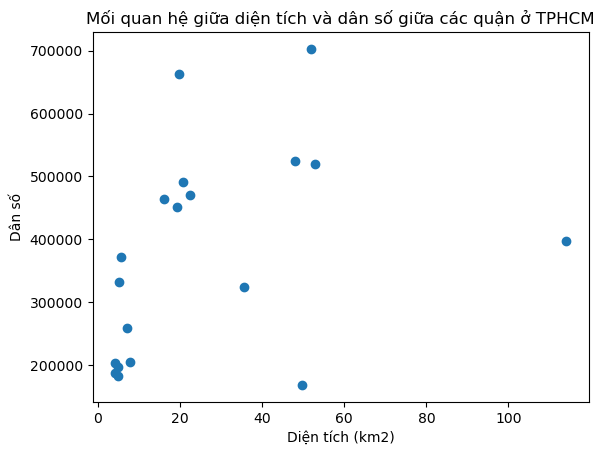

In [11]:
# Biểu đồ mối quan hệ giữa dân số và diện tích của các quận tại TPHCM
plt.scatter(df_districts['area_km2'], df_districts['population'])
plt.xlabel('Diện tích (km2)')
plt.ylabel('Dân số')
plt.title('Mối quan hệ giữa diện tích và dân số giữa các quận ở TPHCM')

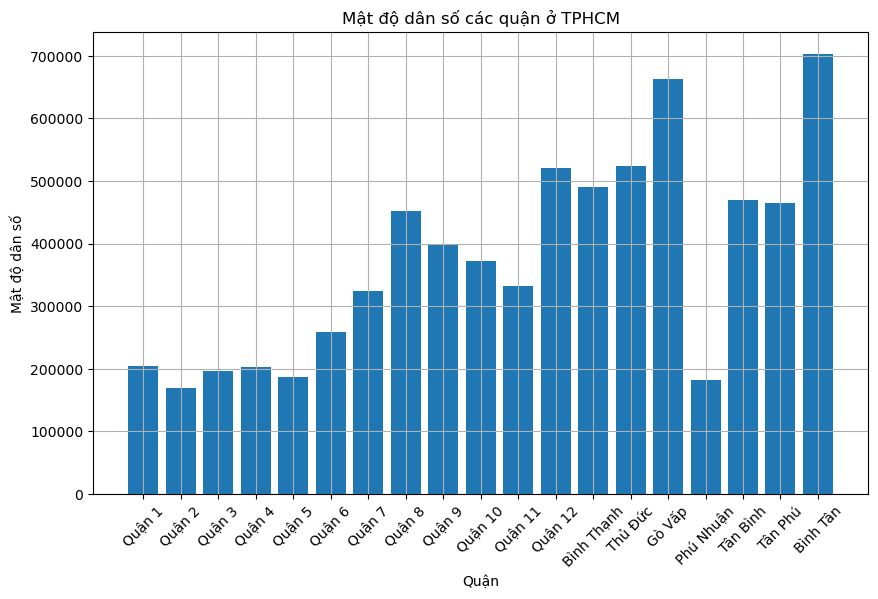

In [17]:
# Biểu đồ dân số các quận
plt.figure(figsize=(10, 6))
plt.bar(df_districts['name'], height=df_districts['population'])
plt.xlabel('Quận')
plt.ylabel('Mật độ dân số')
plt.title('Mật độ dân số các quận ở TPHCM')
plt.xticks(rotation=45)
plt.grid()
plt.show()